# IOE 511 / MATH 562 Optimization Project

## Experiment Runner and Visualization


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import os

import problems
import solver

print("Modules imported.")

Modules imported.


In [20]:
import numpy as np
import time
import algorithms  # Assuming this is your algorithms.py file
import problems  # Assuming this is your problems.py file
from solver import optSolver_WHY # Assuming this is in solver.py

def tune_hyperparameters(problem, method, param_grid, num_trials=5, verbose=False):
    """
    Tunes hyperparameters for a given optimization method on a given problem.

    Args:
        problem (dict): The optimization problem definition.
        method (dict): The method specification (name).
        param_grid (dict): A dictionary of hyperparameters to tune,
            where keys are hyperparameter names and values are lists of
            possible values.
        num_trials (int, optional): The number of trials for each
            hyperparameter combination. Defaults to 5.
        verbose (bool, optional): Whether to print detailed progress.
            Defaults to False.

    Returns:
        dict: A dictionary containing the best hyperparameters found,
            the corresponding best result, and all trial results.
    """
    best_params = None
    best_result = None
    all_results = []

    # Generate all combinations of hyperparameters
    param_names = list(param_grid.keys())
    param_values = list(param_grid.values())
    num_combinations = np.prod([len(v) for v in param_values])
    print(f"Total hyperparameter combinations to test: {num_combinations}")

    combinations = np.array(np.meshgrid(*param_values)).T.reshape(-1, len(param_names))

    for i, combination in enumerate(combinations):
        params = dict(zip(param_names, combination))
        if verbose:
            print(f"\n--- Tuning Trial {i + 1}/{num_combinations} ---")
            print(f"Testing parameters: {params}")

        trial_results = []
        for j in range(num_trials):
            if verbose:
                print(f"  Trial {j + 1}/{num_trials}: Running optimization...")
            start_time = time.time()
            x, f_val, info = optSolver_WHY(problem, method, params)
            end_time = time.time()
            trial_time = end_time - start_time

            result = {
                'trial': j + 1,
                'x': x,
                'f_val': f_val,
                'iterations': info['iterations'],
                'time': trial_time,
                'success': info['success'],
                'params': params,  # Include params in each trial result
            }
            trial_results.append(result)

        # Average results across trials for this parameter combination
        avg_f_val = np.mean([r['f_val'] for r in trial_results])
        avg_iterations = np.mean([r['iterations'] for r in trial_results])
        avg_time = np.mean([r['time'] for r in trial_results])
        success_rate = np.mean([r['success'] for r in trial_results])

        # Consider using a weighted combination of metrics
        # For example, prioritize success, then f_val, then time
        composite_score = (success_rate * 1000) - avg_f_val + (100 / avg_time)

        if best_result is None or composite_score > best_result['composite_score']:
            best_result = {
                'avg_f_val': avg_f_val,
                'avg_iterations': avg_iterations,
                'avg_time': avg_time,
                'success_rate': success_rate,
                'params': params,
                'composite_score': composite_score, # Store the score
            }
            best_params = params

        all_results.append({
            'params': params,
            'trial_results': trial_results,
            'avg_f_val': avg_f_val,
            'avg_iterations': avg_iterations,
            'avg_time': avg_time,
            'success_rate': success_rate
        })

        if verbose:
            print("  Average Results:")
            print(f"    Avg f(x): {avg_f_val:.4e}")
            print(f"    Avg Iterations: {avg_iterations:.2f}")
            print(f"    Avg Time: {avg_time:.4f} seconds")
            print(f"    Success Rate: {success_rate:.2%}")
            print("Best Result So Far:")
            print(f"    Best Params: {best_params}")
            print(f"    Avg f(x): {best_result['avg_f_val']:.4e}")
            print(f"    Avg Iterations: {best_result['avg_iterations']:.2f}")
            print(f"     Avg Time: {best_result['avg_time']:.4f}")
            print(f"    Success Rate: {best_result['success_rate']:.2%}")

    print("\n--- Hyperparameter Tuning Complete ---")
    print("Best Hyperparameters:")
    print(best_params)
    print("Best Results:")
    print(f"  Avg f(x): {best_result['avg_f_val']:.4e}")
    print(f"  Avg Iterations: {best_result['avg_iterations']:.2f}")
    print(f"  Avg Time: {best_result['avg_time']:.4f} seconds")
    print(f"  Success Rate: {best_result['success_rate']:.2%}")

    return {
        'best_params': best_params,
        'best_result': best_result,
        'all_results': all_results,
    }

if __name__ == '__main__':
    # Example usage:
    problem_name = 'quad_10_10'  # Or any problem from your problems.py
    problem = problems.get_problem(problem_name).to_dict()
    method = {'name': 'GradientDescent'}  # Or any method from your algorithms.py

    # Define the hyperparameter grid to search
    param_grid = {
        'alpha_init': [0.1, 1.0, 10.0],  # Initial step size
        'c1_ls': [1e-4, 1e-3, 1e-2],    # Armijo condition parameter
        'c': [0.1, 0.5, 0.9],          # Step size reduction factor
        'term_tol': [1e-6, 1e-8],
        'max_iterations': [100, 1000]
    }

    # Run the hyperparameter tuning
    tuning_results = tune_hyperparameters(problem, method, param_grid, num_trials=3, verbose=True)

    # Print the best hyperparameters and results
    print("\nBest Hyperparameters:")
    print(tuning_results['best_params'])
    print("\nBest Results:")
    print(tuning_results['best_result'])

Total hyperparameter combinations to test: 108

--- Tuning Trial 1/108 ---
Testing parameters: {'alpha_init': np.float64(0.1), 'c1_ls': np.float64(0.0001), 'c': np.float64(0.1), 'term_tol': np.float64(1e-06), 'max_iterations': np.float64(100.0)}
  Trial 1/3: Running optimization...
  Trial 2/3: Running optimization...
  Trial 3/3: Running optimization...
  Average Results:
    Avg f(x): -2.4269e+01
    Avg Iterations: 100.00
    Avg Time: 0.0010 seconds
    Success Rate: 0.00%
Best Result So Far:
    Best Params: {'alpha_init': np.float64(0.1), 'c1_ls': np.float64(0.0001), 'c': np.float64(0.1), 'term_tol': np.float64(1e-06), 'max_iterations': np.float64(100.0)}
    Avg f(x): -2.4269e+01
    Avg Iterations: 100.00
     Avg Time: 0.0010
    Success Rate: 0.00%

--- Tuning Trial 2/108 ---
Testing parameters: {'alpha_init': np.float64(0.1), 'c1_ls': np.float64(0.001), 'c': np.float64(0.1), 'term_tol': np.float64(1e-06), 'max_iterations': np.float64(100.0)}
  Trial 1/3: Running optimization

## 1. Define Problems and Methods

Define the set of problems and optimization methods to compare.

In [ ]:
# List of problem names to test
problem_names = [
    'quad_10_10',
    'quad_10_1000',
    'quad_1000_10',
    'quad_1000_1000',
    'quartic_1',           
    'quartic_2',            
    'Rosenbrock_2',       
    'Rosenbrock_100',      
    'DataFit_2',            
    'Exponential_10',       
    'Exponential_1000',    
    'Exponential_100',      
    'Genhumps_5',           
    'Powell',               
    'IllConditioned_10_6'   
]

# Load problems
# Note: Ensure .mat files for quadratic problems are accessible (e.g., in the same directory)
test_problems = []
missing_files = False
for name in problem_names:
    try:
        # The get_problem function handles loading .mat files internally now
        problem_obj = problems.get_problem(name)
        test_problems.append(problem_obj.to_dict()) # Convert to dict for solver
    except FileNotFoundError as e:
        print(f"Warning: Could not load problem '{name}'. {e}. Skipping.")
        missing_files = True
    except Exception as e:
        print(f"Warning: Error loading problem '{name}': {e}. Skipping.")
        missing_files = True

if missing_files:
    print("\nEnsure the .mat files for quadratic problems are in the correct directory.")

# List of methods to test (using names expected by solver.py)
method_specs = [
    {'name': 'GradientDescent'},     # Backtracking 
    {'name': 'GradientDescentW'},    # Wolfe
    {'name': 'Newton'},              # Backtracking 
    {'name': 'NewtonW'},             # Wolfe 
    {'name': 'BFGS'},                # Backtracking 
    {'name': 'BFGSW'},               # Wolfe 
    {'name': 'DFP'},                 # Backtracking 
    {'name': 'DFPW'},                # Wolfe
    {'name': 'TRNewtonCG'},          # Trust Region Newton CG 
    {'name': 'TRSR1CG'},             # Trust Region SR1 CG 
    # L-BFGS Variants - Add memory size and strategy 
    {'name': 'LBFGS-M5-FIFO'},
    {'name': 'LBFGS-M5-MIN_CURV'},
    {'name': 'LBFGS-M5-ADAPTIVE'},
    {'name': 'LBFGS-M10-FIFO'},
    {'name': 'LBFGS-M10-MIN_CURV'},
    {'name': 'LBFGS-M10-ADAPTIVE'}
]

print(f"Loaded {len(test_problems)} problems.")
print(f"Defined {len(method_specs)} methods.")

Loaded 15 problems.
Defined 16 methods.


## 2. Define Options and Run Experiments

Set common optimization options and run the solver for each problem-method pair.

In [4]:
# Define common options
options = {
    # Regular trust region parameters
    'delta_init': 1.0,           # Initial trust region size
    'c1_tr': 0.5,                # TR contraction factor (higher = more conservative)
    'c2_tr': 1.5,                # TR expansion factor (lower = more conservative)
    
    # New parameters to control oscillation
    'delta_dampening': 0.8,      # Controls smoothness of TR changes (0.5-0.9)
    'sr1_reg_init': 1e-6,        # Initial regularization
    'sr1_reg_update': 1.2,       # How quickly regularization increases
    'strict_acceptance': True,    # Use stricter step acceptance
    'adaptive_tr': True,         # Enable adaptive trust region
}

# Store results
results = {}
detailed_info = {} # Store the full info dict for analysis

for problem in test_problems:
    problem_name = problem['name']
    print(f"\n--- Solving Problem: {problem_name} ---")
    results[problem_name] = {}
    detailed_info[problem_name] = {}
    
    for method in method_specs:
        method_name = method['name']
        print(f"  Using Method: {method_name}...")
        
        # Make a deep copy of options to avoid modification across runs if needed
        current_options = options.copy()
        
        # Make a copy of the problem dict to potentially reset x0 if necessary
        problem_instance = problem.copy()
        problem_instance['x0'] = problem['x0'].copy() # Ensure x0 is reset
        
        start_run_time = time.time()
        try:
            import copy
            # import time # Already imported at the top

            # --- Prepare arguments for solver.optSolver_WHY ---
            # 1. Method dictionary (containing the name)
            method_dict = {'name': method_name} # Uses method_name from the inner loop

            # 2. Options dictionary (Use the 'options' defined earlier in this cell)
            #    Make a deep copy to ensure options aren't changed between runs
            current_options = copy.deepcopy(options)
            # No method_options to update with based on Cell 4 definition

            # 3. Problem instance dictionary (already available as problem_instance)
            #    Ensuring x0 reset is already handled before the try block

            x_final, f_final, info = solver.optSolver_WHY(problem_instance, method_dict, current_options)

            end_run_time = time.time()
            run_time = end_run_time - start_run_time

            # --- Store Summary Results (for table) ---
            results[problem_name][method_name] = {
                'Iterations': info['iterations'],
                'Final f(x)': f_final,
                'Final ||∇f(x)||': info['grad_norms'][-1] if info.get('grad_norms') else 'N/A',
                'CPU Time (s)': run_time,
                'Success': info['success'],
                'Termination': info['termination_reason']
            }
            # Store full info for plotting
            detailed_info[problem_name][method_name] = info
            print(f"  Finished in {run_time:.4f} s, Iterations: {info['iterations']}, Success: {info['success']}")

        except Exception as e:
            # Capture runtime even on failure if possible before the error
            end_run_time = time.time()
            run_time = end_run_time - start_run_time
            print(f"  Failed: {e}") # Original error gets printed here

            # --- Store Failure Results ---
            results[problem_name][method_name] = {
                'Iterations': 'Error',
                'Final f(x)': 'Error',
                'Final ||∇f(x)||': 'Error',
                'CPU Time (s)': run_time, # Record time until failure
                'Success': False,
                'Termination': f'Failed with {type(e).__name__}'
            }
            detailed_info[problem_name][method_name] = {'termination_reason': str(e), 'success': False}

            



--- Solving Problem: quad_10_10 ---
  Using Method: GradientDescent...
  Finished in 0.0025 s, Iterations: 117, Success: True
  Using Method: GradientDescentW...
  Finished in 0.0015 s, Iterations: 117, Success: True
  Using Method: Newton...
  Finished in 0.0005 s, Iterations: 1, Success: True
  Using Method: NewtonW...
  Finished in 0.0000 s, Iterations: 1, Success: True
  Using Method: BFGS...
  Finished in 0.0015 s, Iterations: 26, Success: True
  Using Method: BFGSW...
  Finished in 0.0010 s, Iterations: 26, Success: True
  Using Method: DFP...
  Finished in 0.0010 s, Iterations: 42, Success: True
  Using Method: DFPW...
  Finished in 0.0020 s, Iterations: 42, Success: True
  Using Method: TRNewtonCG...
  Finished in 0.0405 s, Iterations: 1000, Success: False
  Using Method: TRSR1CG...
  Finished in 0.0511 s, Iterations: 1000, Success: False
  Using Method: LBFGS-M5-FIFO...
  Finished in 0.0010 s, Iterations: 22, Success: True
  Using Method: LBFGS-M5-MIN_CURV...
  Finished in 0.

c:\Users\will\iCloudDrive\Documents\U-M\ioe_511\project_final\problems.py:221: RuntimeWarning: overflow encountered in square
  term2 = 100 * (x[1:] - x[:-1]**2)**2
c:\Users\will\iCloudDrive\Documents\U-M\ioe_511\project_final\problems.py:220: RuntimeWarning: overflow encountered in square
  term1 = (1 - x[:-1])**2
c:\Users\will\iCloudDrive\Documents\U-M\ioe_511\project_final\algorithms.py:46: RuntimeWarning: invalid value encountered in scalar add
  if f_new <= f_x + c1 * alpha * dir_deriv:
c:\Users\will\iCloudDrive\Documents\U-M\ioe_511\project_final\problems.py:231: RuntimeWarning: overflow encountered in square
  term_in_paren = x[1:] - x[:-1]**2
c:\Users\will\iCloudDrive\Documents\U-M\ioe_511\project_final\problems.py:232: RuntimeWarning: overflow encountered in multiply
  g[:-1] = -2 * (1 - x[:-1]) - 400 * x[:-1] * term_in_paren
c:\Users\will\iCloudDrive\Documents\U-M\ioe_511\project_final\algorithms.py:782: RuntimeWarning: overflow encountered in matmul
  ys = y @ s


  Finished in 0.4169 s, Iterations: 299, Success: False
  Using Method: BFGSW...
  Finished in 0.2612 s, Iterations: 1000, Success: False
  Using Method: DFP...
  Finished in 0.0385 s, Iterations: 185, Success: False
  Using Method: DFPW...


c:\Users\will\iCloudDrive\Documents\U-M\ioe_511\project_final\algorithms.py:883: RuntimeWarning: overflow encountered in matmul
  ys = y @ s
c:\Users\will\iCloudDrive\Documents\U-M\ioe_511\project_final\algorithms.py:886: RuntimeWarning: overflow encountered in matmul
  yHy = y @ Hy
c:\Users\will\iCloudDrive\Documents\U-M\ioe_511\project_final\algorithms.py:886: RuntimeWarning: invalid value encountered in matmul
  yHy = y @ Hy
c:\Users\will\iCloudDrive\Documents\U-M\ioe_511\project_final\algorithms.py:883: RuntimeWarning: invalid value encountered in matmul
  ys = y @ s
c:\Users\will\iCloudDrive\Documents\U-M\ioe_511\project_final\algorithms.py:866: RuntimeWarning: invalid value encountered in matmul
  d = -H_inv @ grad_x


  Finished in 0.1707 s, Iterations: 1000, Success: False
  Using Method: TRNewtonCG...
  Finished in 123.3306 s, Iterations: 1000, Success: False
  Using Method: TRSR1CG...
  Finished in 0.0420 s, Iterations: 1000, Success: False
  Using Method: LBFGS-M5-FIFO...
  Finished in 0.1827 s, Iterations: 1000, Success: False
  Using Method: LBFGS-M5-MIN_CURV...
  Finished in 0.1887 s, Iterations: 1000, Success: False
  Using Method: LBFGS-M5-ADAPTIVE...
  Finished in 0.2147 s, Iterations: 1000, Success: False
  Using Method: LBFGS-M10-FIFO...
  Finished in 0.2277 s, Iterations: 1000, Success: False
  Using Method: LBFGS-M10-MIN_CURV...
  Finished in 0.2352 s, Iterations: 1000, Success: False
  Using Method: LBFGS-M10-ADAPTIVE...
  Finished in 0.2627 s, Iterations: 1000, Success: False

--- Solving Problem: DataFit_2 ---
  Using Method: GradientDescent...
  Finished in 0.0385 s, Iterations: 786, Success: True
  Using Method: GradientDescentW...
  Finished in 0.0791 s, Iterations: 689, Success:

c:\Users\will\iCloudDrive\Documents\U-M\ioe_511\project_final\problems.py:273: RuntimeWarning: overflow encountered in square
  return np.sum(residuals**2)
c:\Users\will\iCloudDrive\Documents\U-M\ioe_511\project_final\problems.py:49: RuntimeWarning: invalid value encountered in scalar subtract
  hess[i,i] = (f_p - 2*fx + f_m) / (eps**2)
c:\Users\will\iCloudDrive\Documents\U-M\ioe_511\project_final\problems.py:52: RuntimeWarning: invalid value encountered in scalar subtract
  hess[i,j] = (f_pp - f_pm - f_mp + f_mm) / (4 * eps**2)


  Finished in 0.4444 s, Iterations: 1000, Success: False
  Using Method: BFGS...
  Finished in 0.0010 s, Iterations: 15, Success: True
  Using Method: BFGSW...
  Finished in 0.0010 s, Iterations: 15, Success: True
  Using Method: DFP...
  Finished in 0.0005 s, Iterations: 24, Success: True
  Using Method: DFPW...
  Finished in 0.0010 s, Iterations: 24, Success: True
  Using Method: TRNewtonCG...
  Finished in 0.0015 s, Iterations: 11, Success: True
  Using Method: TRSR1CG...
  Finished in 0.0035 s, Iterations: 66, Success: True
  Using Method: LBFGS-M5-FIFO...
  Finished in 0.0005 s, Iterations: 12, Success: True
  Using Method: LBFGS-M5-MIN_CURV...
  Finished in 0.0005 s, Iterations: 21, Success: True
  Using Method: LBFGS-M5-ADAPTIVE...
  Finished in 0.0005 s, Iterations: 13, Success: True
  Using Method: LBFGS-M10-FIFO...
  Finished in 0.0005 s, Iterations: 12, Success: True
  Using Method: LBFGS-M10-MIN_CURV...
  Finished in 0.0005 s, Iterations: 12, Success: True
  Using Method: L

c:\Users\will\iCloudDrive\Documents\U-M\ioe_511\project_final\problems.py:323: RuntimeWarning: overflow encountered in exp
  term1 = (exp_x0 - 1) / (exp_x0 + 1) + 0.1 * np.exp(-x[0])
c:\Users\will\iCloudDrive\Documents\U-M\ioe_511\project_final\problems.py:334: RuntimeWarning: overflow encountered in exp
  exp_neg_x0 = np.exp(-x[0])


  Finished in 1.5830 s, Iterations: 1000, Success: False
  Using Method: BFGS...
  Finished in 0.0455 s, Iterations: 1000, Success: False
  Using Method: BFGSW...
  Finished in 0.0661 s, Iterations: 1000, Success: False
  Using Method: DFP...
  Finished in 0.0265 s, Iterations: 1000, Success: False
  Using Method: DFPW...
  Finished in 0.0551 s, Iterations: 1000, Success: False
  Using Method: TRNewtonCG...
  Finished in 0.1446 s, Iterations: 104, Success: True
  Using Method: TRSR1CG...
  Finished in 0.0060 s, Iterations: 113, Success: True
  Using Method: LBFGS-M5-FIFO...
  Finished in 0.0010 s, Iterations: 15, Success: True
  Using Method: LBFGS-M5-MIN_CURV...
  Finished in 0.0010 s, Iterations: 15, Success: True
  Using Method: LBFGS-M5-ADAPTIVE...
  Finished in 0.0010 s, Iterations: 15, Success: True
  Using Method: LBFGS-M10-FIFO...
  Finished in 0.0005 s, Iterations: 15, Success: True
  Using Method: LBFGS-M10-MIN_CURV...
  Finished in 0.0010 s, Iterations: 15, Success: True
  U

KeyboardInterrupt: 

## 3. Results Summary Table

Display the summary results in a table as requested.

In [5]:
# --- Create Summary Table --- 
summary_data = []
method_names_list = [m['name'] for m in method_specs]

for prob_name in results:
    for meth_name in method_names_list:
        if meth_name in results[prob_name]:
            res = results[prob_name][meth_name]
            # Format results for display
            iter_disp = res['Iterations']
            f_disp = f"{res['Final f(x)']:.4e}" if isinstance(res['Final f(x)'], (int, float)) else 'Fail'
            norm_disp = f"{res['Final ||∇f(x)||']:.4e}" if isinstance(res['Final ||∇f(x)||'], (int, float)) else 'Fail'
            time_disp = f"{res['CPU Time (s)']:.4f}" if isinstance(res['CPU Time (s)'], (int, float)) else 'Fail'
            success_disp = 'Yes' if res['Success'] else 'No'
            
            summary_data.append({
                'Problem': prob_name,
                'Method': meth_name,
                'Iterations': iter_disp,
                'Final f(x)': f_disp,
                'Final ||∇f(x)||': norm_disp,
                'CPU Time (s)': time_disp,
                'Success': success_disp
            })
        else:
             # Handle cases where a method might not have results for a problem
             summary_data.append({
                'Problem': prob_name,
                'Method': meth_name,
                'Iterations': 'N/A',
                'Final f(x)': 'N/A',
                'Final ||∇f(x)||': 'N/A',
                'CPU Time (s)': 'N/A',
                'Success': 'N/A'
            })

# Create DataFrame for better display
# Ensure display is imported if running outside a standard Jupyter environment
try:
    from IPython.display import display
except ImportError:
    display = print # Fallback to print if display is not available
summary_df = pd.DataFrame(summary_data)
summary_df.set_index(['Problem', 'Method'], inplace=True)

# Display the table
print("--- Summary of Results ---")
display(summary_df)

--- Summary of Results ---


Iterations   Final f(x) Final ||∇f(x)||  \
Problem          Method                                                       
quad_10_10       GradientDescent           117  -2.4709e+01      9.9361e-07   
                 GradientDescentW          117  -2.4709e+01      9.9361e-07   
                 Newton                      1  -2.4709e+01      7.0066e-16   
                 NewtonW                     1  -2.4709e+01      7.0066e-16   
                 BFGS                       26  -2.4709e+01      5.5645e-07   
...                                        ...          ...             ...   
Exponential_1000 LBFGS-M5-MIN_CURV         N/A          N/A             N/A   
                 LBFGS-M5-ADAPTIVE         N/A          N/A             N/A   
                 LBFGS-M10-FIFO            N/A          N/A             N/A   
                 LBFGS-M10-MIN_CURV        N/A          N/A             N/A   
                 LBFGS-M10-ADAPTIVE        N/A          N/A             N/A   

                                    CPU Time (s) Success  
Problem          Method                                   
quad_10_10       GradientDescent          0.0025     Yes  
                 GradientDescentW         0.0015     Yes  
                 Newton                   0.0005     Yes  
                 NewtonW                  0.0000     Yes  
                 BFGS                     0.0015     Yes  
...                                          ...     ...  
Exponential_1000 LBFGS-M5-MIN_CURV           N/A     N/A  
                 LBFGS-M5-ADAPTIVE           N/A     N/A  
                 LBFGS-M10-FIFO              N/A     N/A  
                 LBFGS-M10-MIN_CURV          N/A     N/A  
                 LBFGS-M10-ADAPTIVE          N/A     N/A  

[176 rows x 5 columns]

In [6]:
print("\nUnique values in Problem level:", summary_df.index.get_level_values('Problem').unique())
print("\nUnique values in Method level:", summary_df.index.get_level_values('Method').unique())


Unique values in Problem level: Index(['quad_10_10', 'quad_10_1000', 'quad_1000_10', 'quad_1000_1000',
       'P5_quartic_1', 'P6_quartic_2', 'Rosenbrock_2', 'Rosenbrock_100',
       'DataFit_2', 'Exponential_10', 'Exponential_1000'],
      dtype='object', name='Problem')

Unique values in Method level: Index(['GradientDescent', 'GradientDescentW', 'Newton', 'NewtonW', 'BFGS',
       'BFGSW', 'DFP', 'DFPW', 'TRNewtonCG', 'TRSR1CG', 'LBFGS-M5-FIFO',
       'LBFGS-M5-MIN_CURV', 'LBFGS-M5-ADAPTIVE', 'LBFGS-M10-FIFO',
       'LBFGS-M10-MIN_CURV', 'LBFGS-M10-ADAPTIVE'],
      dtype='object', name='Method')


In [22]:
summary_df.loc['quad_10_1000']

Iterations   Final f(x) Final ||∇f(x)|| CPU Time (s)  \
Method                                                                    
GradientDescent          1000  -6.6714e+02      1.2759e-01       0.0105   
GradientDescentW         1000  -6.7362e+02      4.5580e-03       0.0220   
Newton                      1  -6.7363e+02      3.5092e-15       0.0000   
NewtonW                     1  -6.7363e+02      3.5092e-15       0.0000   
BFGS                       57  -6.7363e+02      3.9094e-07       0.0020   
BFGSW                      57  -6.7363e+02      3.9094e-07       0.0020   
DFP                      1000  -6.7326e+02      5.9716e-01       0.0185   
DFPW                     1000  -6.7326e+02      5.9716e-01       0.0195   
TRNewtonCG                169  -6.7363e+02      9.1306e-10       0.0065   
TRSR1CG                   101  -6.7363e+02      1.8992e-12       0.0080   
LBFGS-M5-FIFO             317  -6.7363e+02      9.9744e-07       0.0140   
LBFGS-M5-MIN_CURV         161  -6.7363e+02      9.7406e-07       0.0120   
LBFGS-M5-ADAPTIVE         160  -6.7363e+02      9.8963e-07       0.0060   
LBFGS-M10-FIFO             90  -6.7363e+02      9.8406e-07       0.0045   
LBFGS-M10-MIN_CURV        368  -6.7363e+02      9.9851e-07       0.0185   
LBFGS-M10-ADAPTIVE        111  -6.7363e+02      9.9350e-07       0.0055   

                   Success  
Method                      
GradientDescent         No  
GradientDescentW        No  
Newton                 Yes  
NewtonW                Yes  
BFGS                   Yes  
BFGSW                  Yes  
DFP                     No  
DFPW                    No  
TRNewtonCG             Yes  
TRSR1CG                Yes  
LBFGS-M5-FIFO          Yes  
LBFGS-M5-MIN_CURV      Yes  
LBFGS-M5-ADAPTIVE      Yes  
LBFGS-M10-FIFO         Yes  
LBFGS-M10-MIN_CURV     Yes  
LBFGS-M10-ADAPTIVE     Yes

In [7]:
summary_df.loc['quad_10_10']

Iterations   Final f(x) Final ||∇f(x)|| CPU Time (s)  \
Method                                                                    
GradientDescent           117  -2.4709e+01      9.9361e-07       0.0025   
GradientDescentW          117  -2.4709e+01      9.9361e-07       0.0015   
Newton                      1  -2.4709e+01      7.0066e-16       0.0005   
NewtonW                     1  -2.4709e+01      7.0066e-16       0.0000   
BFGS                       26  -2.4709e+01      5.5645e-07       0.0015   
BFGSW                      26  -2.4709e+01      5.5645e-07       0.0010   
DFP                        42  -2.4709e+01      9.3873e-07       0.0010   
DFPW                       42  -2.4709e+01      9.3873e-07       0.0020   
TRNewtonCG               1000  -2.4705e+01      5.7880e-02       0.0405   
TRSR1CG                  1000  -2.4709e+01      6.0924e-03       0.0511   
LBFGS-M5-FIFO              22  -2.4709e+01      6.4937e-07       0.0010   
LBFGS-M5-MIN_CURV          26  -2.4709e+01      7.2922e-07       0.0005   
LBFGS-M5-ADAPTIVE          19  -2.4709e+01      3.1958e-07       0.0000   
LBFGS-M10-FIFO             17  -2.4709e+01      9.9717e-07       0.0015   
LBFGS-M10-MIN_CURV         18  -2.4709e+01      1.9027e-07       0.0005   
LBFGS-M10-ADAPTIVE         18  -2.4709e+01      8.8959e-07       0.0005   

                   Success  
Method                      
GradientDescent        Yes  
GradientDescentW       Yes  
Newton                 Yes  
NewtonW                Yes  
BFGS                   Yes  
BFGSW                  Yes  
DFP                    Yes  
DFPW                   Yes  
TRNewtonCG              No  
TRSR1CG                 No  
LBFGS-M5-FIFO          Yes  
LBFGS-M5-MIN_CURV      Yes  
LBFGS-M5-ADAPTIVE      Yes  
LBFGS-M10-FIFO         Yes  
LBFGS-M10-MIN_CURV     Yes  
LBFGS-M10-ADAPTIVE     Yes

In [9]:
summary_df.loc['Exponential_1000']

Iterations   Final f(x) Final ||∇f(x)|| CPU Time (s)  \
Method                                                                    
GradientDescent            22  -2.0557e-01      9.9800e-07       0.0005   
GradientDescentW           20  -2.0557e-01      5.4249e-07       0.0005   
Newton                     17  -2.0557e-01      4.4245e-07     531.9389   
NewtonW                  1000   9.9950e+02      1.2643e+02   22090.0518   
BFGS                       10  -2.0557e-01      4.6570e-09       1.0378   
BFGSW                       6  -2.0557e-01      3.3853e-07       0.5910   
DFP                        10  -2.0557e-01      4.6597e-09       0.0600   
DFPW                        6  -2.0557e-01      3.3804e-07       0.0455   
TRNewtonCG                N/A          N/A             N/A          N/A   
TRSR1CG                   N/A          N/A             N/A          N/A   
LBFGS-M5-FIFO             N/A          N/A             N/A          N/A   
LBFGS-M5-MIN_CURV         N/A          N/A             N/A          N/A   
LBFGS-M5-ADAPTIVE         N/A          N/A             N/A          N/A   
LBFGS-M10-FIFO            N/A          N/A             N/A          N/A   
LBFGS-M10-MIN_CURV        N/A          N/A             N/A          N/A   
LBFGS-M10-ADAPTIVE        N/A          N/A             N/A          N/A   

                   Success  
Method                      
GradientDescent        Yes  
GradientDescentW       Yes  
Newton                 Yes  
NewtonW                 No  
BFGS                   Yes  
BFGSW                  Yes  
DFP                    Yes  
DFPW                   Yes  
TRNewtonCG             N/A  
TRSR1CG                N/A  
LBFGS-M5-FIFO          N/A  
LBFGS-M5-MIN_CURV      N/A  
LBFGS-M5-ADAPTIVE      N/A  
LBFGS-M10-FIFO         N/A  
LBFGS-M10-MIN_CURV     N/A  
LBFGS-M10-ADAPTIVE     N/A

## 4. Performance Visualization

Plot convergence graphs and performance profiles.

In [ ]:
# 在notebook中添加这些代码来强制重新加载模块
import importlib
import visualization
importlib.reload(visualization)
from visualization import plot_convergence, calculate_performance_ratios, plot_profiles

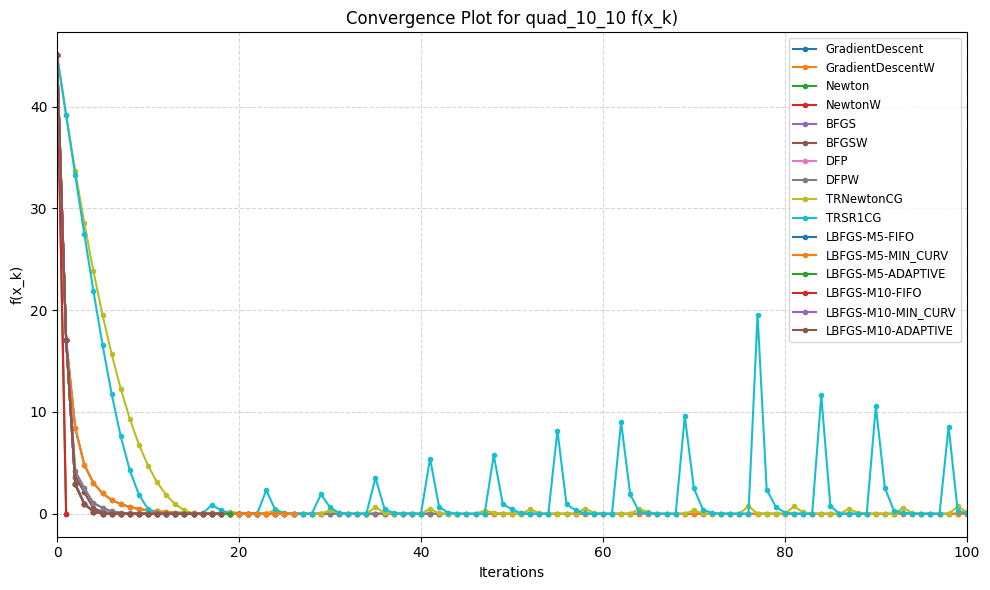

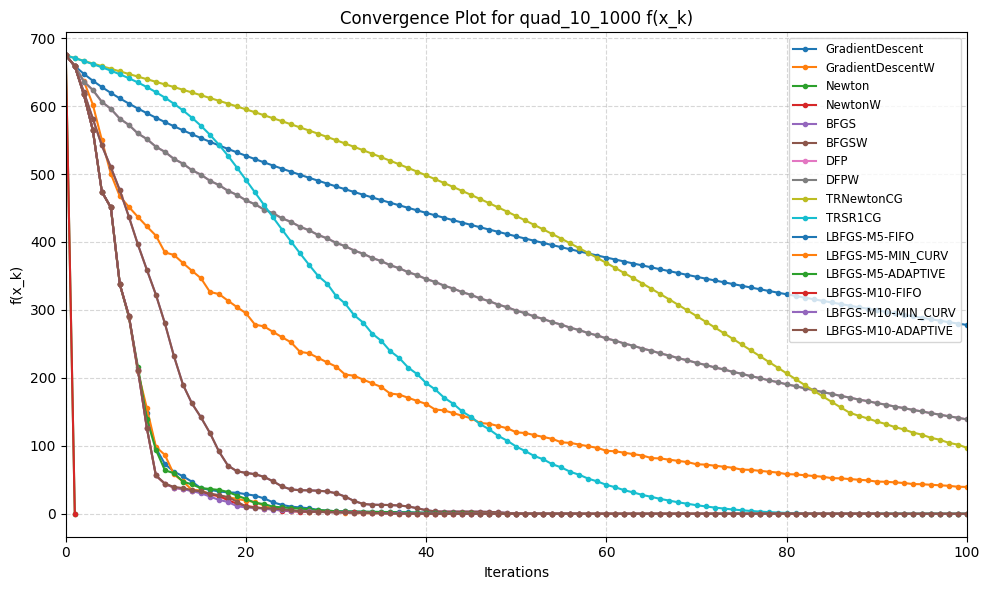

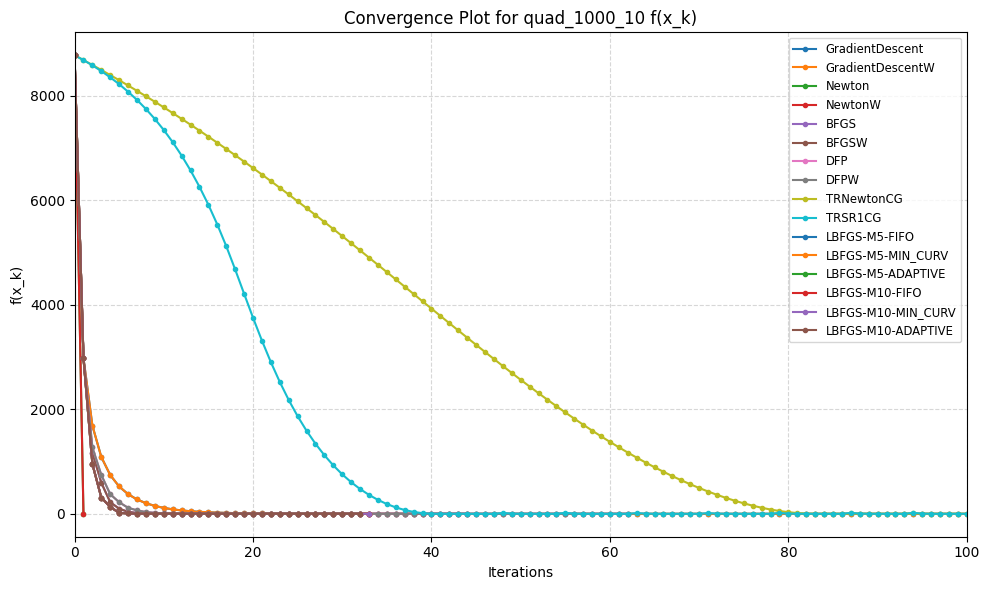

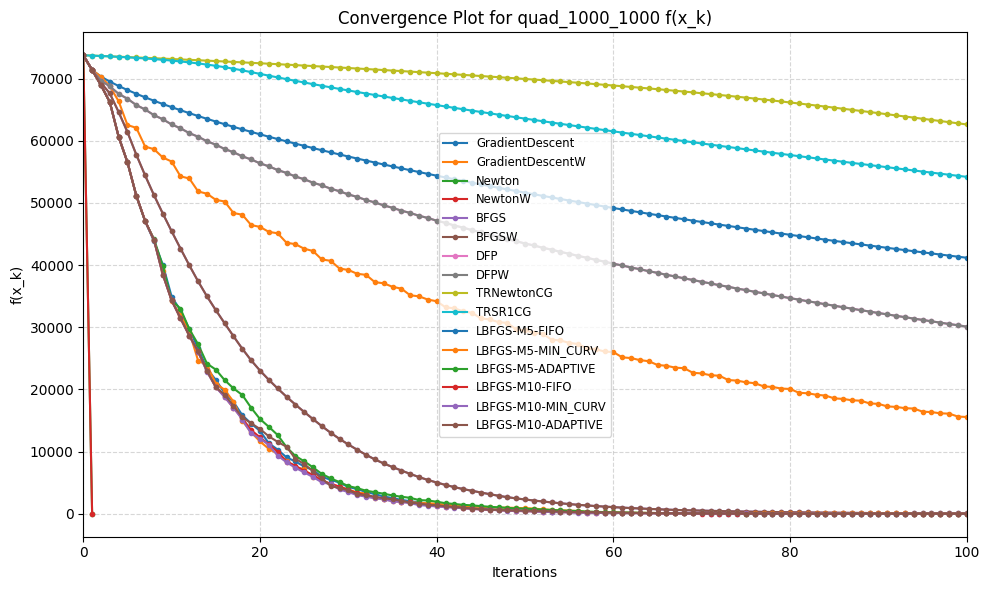

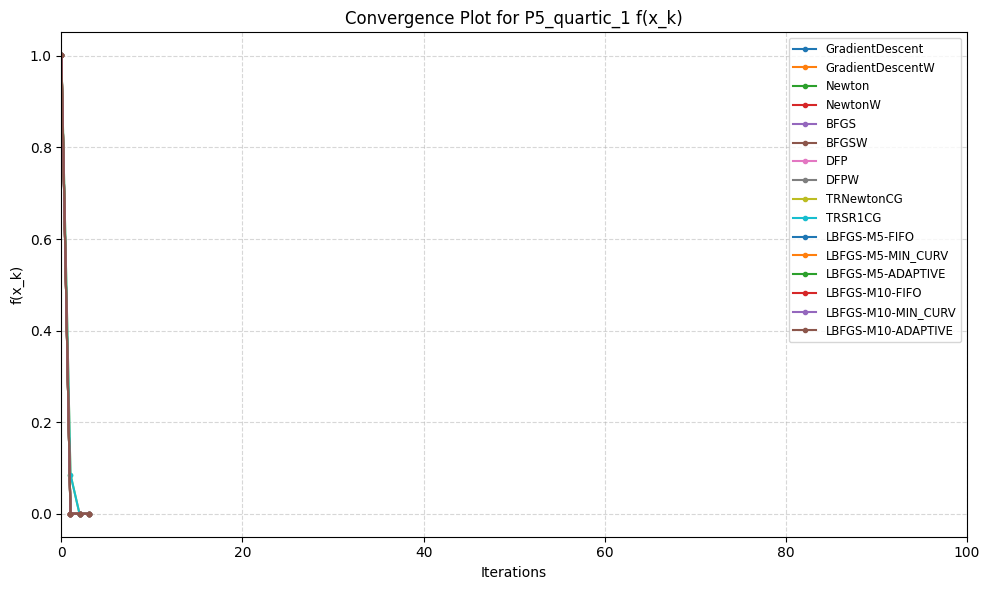

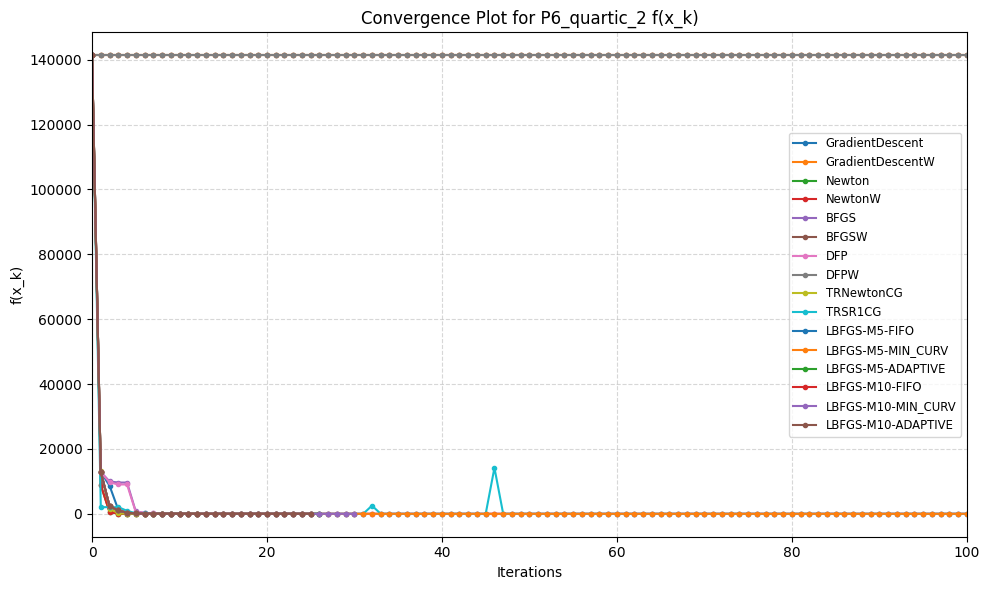

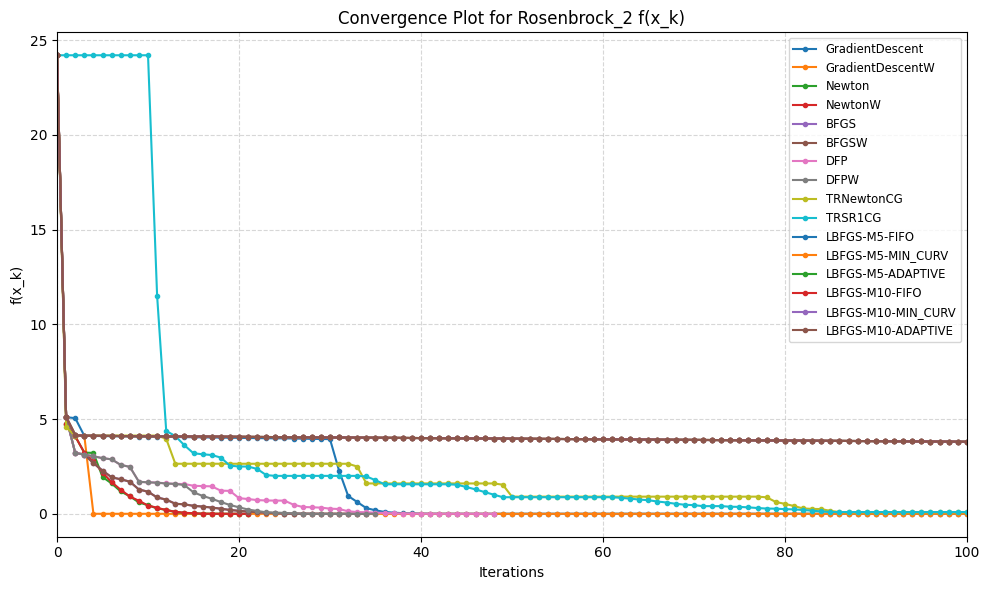

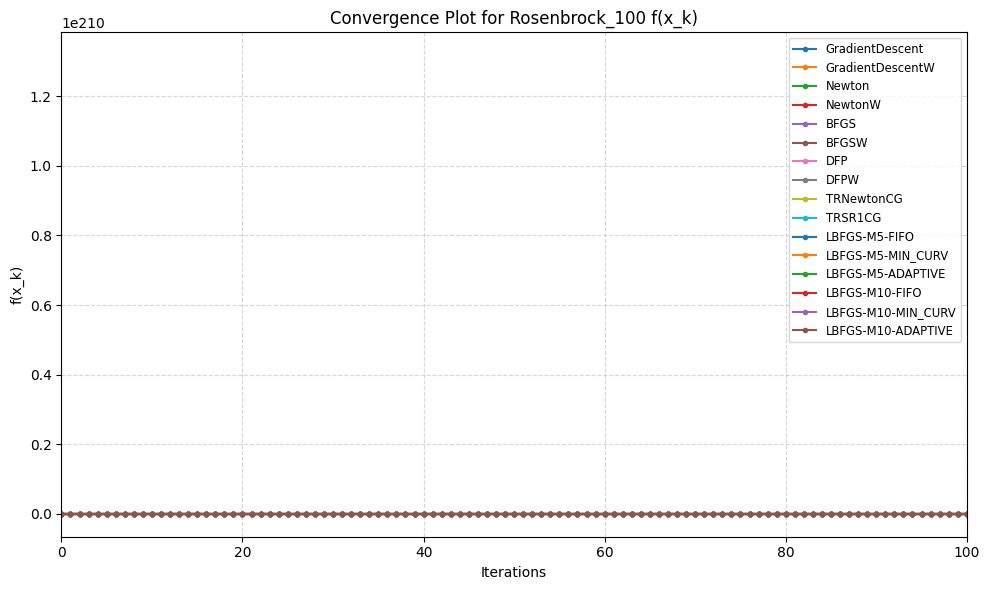

Note: Plotting f(x_k) for GradientDescent on DataFit_2 as f* is unavailable.
Note: Plotting f(x_k) for GradientDescentW on DataFit_2 as f* is unavailable.
Note: Plotting f(x_k) for NewtonW on DataFit_2 as f* is unavailable.
Note: Plotting f(x_k) for BFGS on DataFit_2 as f* is unavailable.
Note: Plotting f(x_k) for BFGSW on DataFit_2 as f* is unavailable.
Note: Plotting f(x_k) for DFP on DataFit_2 as f* is unavailable.
Note: Plotting f(x_k) for DFPW on DataFit_2 as f* is unavailable.
Note: Plotting f(x_k) for TRNewtonCG on DataFit_2 as f* is unavailable.
Note: Plotting f(x_k) for TRSR1CG on DataFit_2 as f* is unavailable.
Note: Plotting f(x_k) for LBFGS-M5-FIFO on DataFit_2 as f* is unavailable.
Note: Plotting f(x_k) for LBFGS-M5-MIN_CURV on DataFit_2 as f* is unavailable.
Note: Plotting f(x_k) for LBFGS-M5-ADAPTIVE on DataFit_2 as f* is unavailable.
Note: Plotting f(x_k) for LBFGS-M10-FIFO on DataFit_2 as f* is unavailable.
Note: Plotting f(x_k) for LBFGS-M10-MIN_CURV on DataFit_2 as f

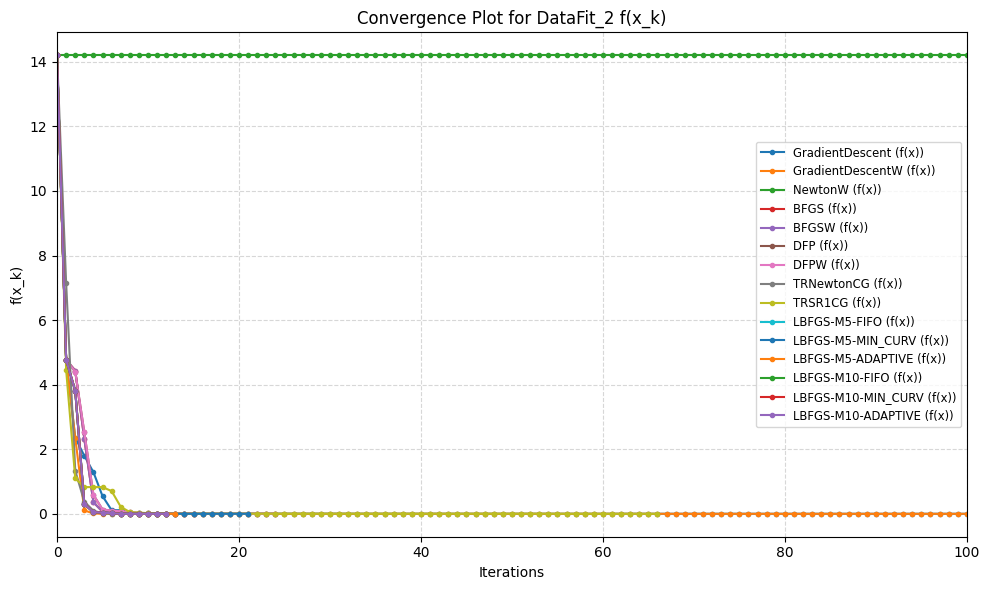

Note: Plotting f(x_k) for GradientDescent on Exponential_10 as f* is unavailable.
Note: Plotting f(x_k) for GradientDescentW on Exponential_10 as f* is unavailable.
Note: Plotting f(x_k) for Newton on Exponential_10 as f* is unavailable.
Note: Plotting f(x_k) for NewtonW on Exponential_10 as f* is unavailable.
Note: Plotting f(x_k) for BFGS on Exponential_10 as f* is unavailable.
Note: Plotting f(x_k) for BFGSW on Exponential_10 as f* is unavailable.
Note: Plotting f(x_k) for DFP on Exponential_10 as f* is unavailable.
Note: Plotting f(x_k) for DFPW on Exponential_10 as f* is unavailable.
Note: Plotting f(x_k) for TRNewtonCG on Exponential_10 as f* is unavailable.
Note: Plotting f(x_k) for TRSR1CG on Exponential_10 as f* is unavailable.
Note: Plotting f(x_k) for LBFGS-M5-FIFO on Exponential_10 as f* is unavailable.
Note: Plotting f(x_k) for LBFGS-M5-MIN_CURV on Exponential_10 as f* is unavailable.
Note: Plotting f(x_k) for LBFGS-M5-ADAPTIVE on Exponential_10 as f* is unavailable.
Note:

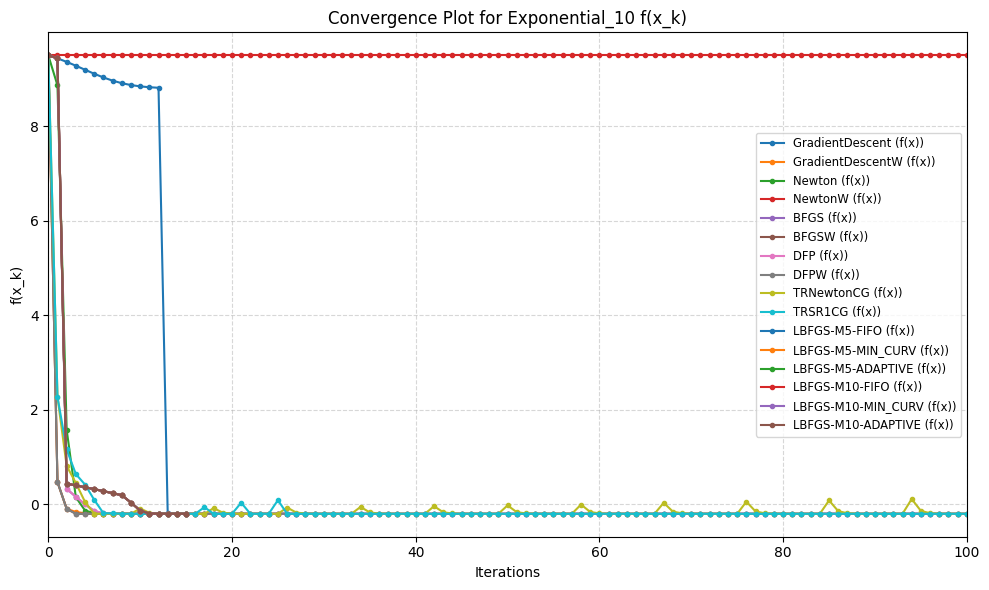

Note: Plotting f(x_k) for GradientDescent on Exponential_1000 as f* is unavailable.
Note: Plotting f(x_k) for GradientDescentW on Exponential_1000 as f* is unavailable.
Note: Plotting f(x_k) for Newton on Exponential_1000 as f* is unavailable.
Note: Plotting f(x_k) for NewtonW on Exponential_1000 as f* is unavailable.
Note: Plotting f(x_k) for BFGS on Exponential_1000 as f* is unavailable.
Note: Plotting f(x_k) for BFGSW on Exponential_1000 as f* is unavailable.
Note: Plotting f(x_k) for DFP on Exponential_1000 as f* is unavailable.
Note: Plotting f(x_k) for DFPW on Exponential_1000 as f* is unavailable.


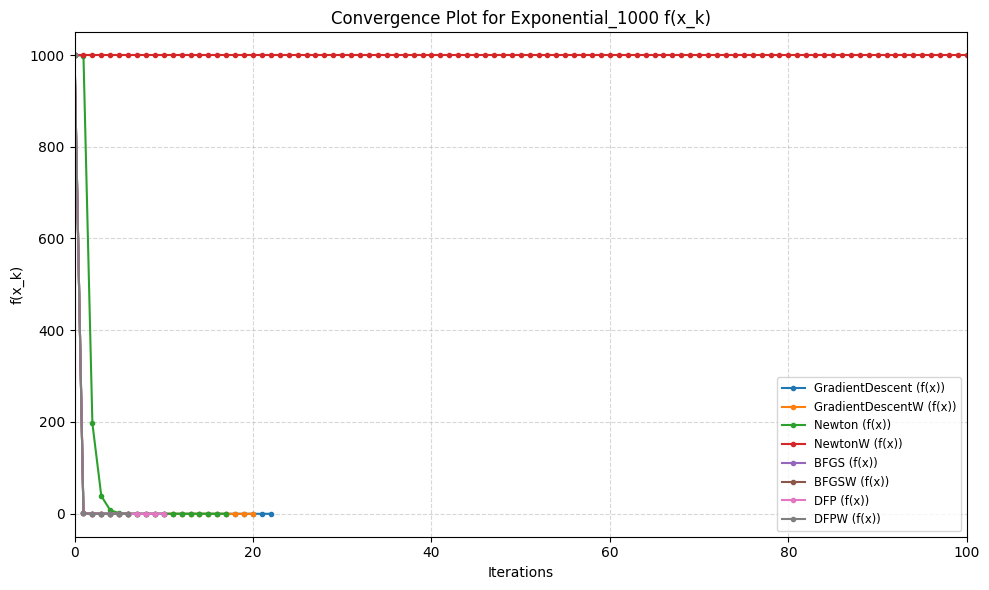

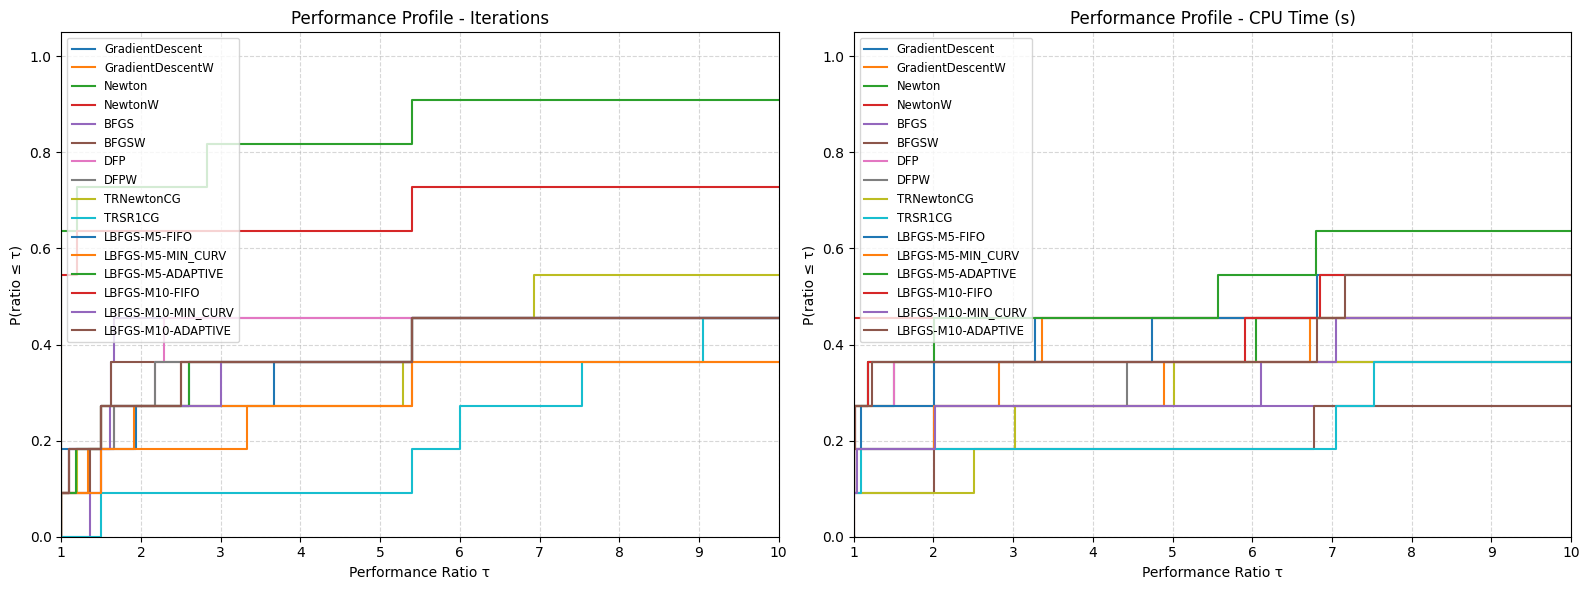

In [25]:
from visualization import plot_convergence, calculate_performance_ratios, plot_profiles

# Call the convergence plot function
plot_convergence(detailed_info)

# Calculate performance ratios without success criteria
perf_ratios = calculate_performance_ratios(results, method_specs)

# Plot the performance profiles
plot_profiles(perf_ratios)